# Dataset Utils

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util.dataset_util import get_data_from_csv
from util.plots_util import plot_heatmap

## Visualization

### AVRORA

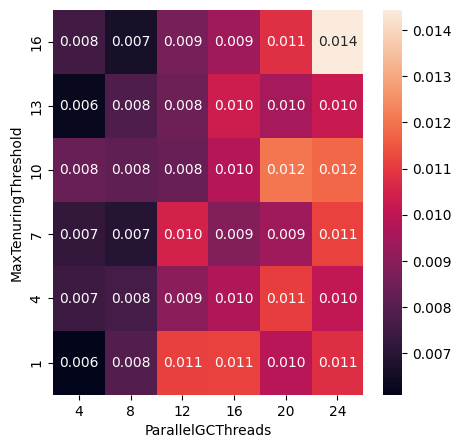

In [3]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/ext_avrora_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_avrora/*", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# df.to_csv("avrora_real_saved_states.csv", index=False)
## Default values (avrora)
# x.append(15)
# y.append(16)
# z.append(0.01106)

### KAFKA

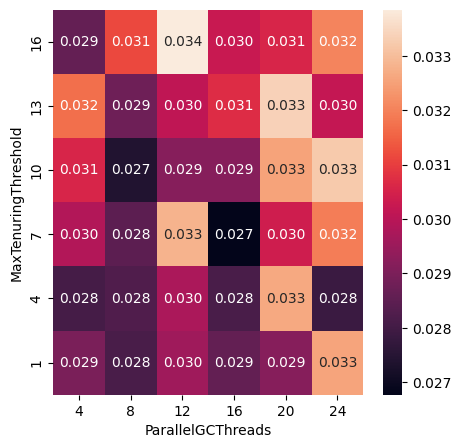

In [4]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/ext_kafka_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_kafka/*", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# kafka_df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# kafka_df.to_csv("kafka_real_saved_states.csv", index=False)

### H2

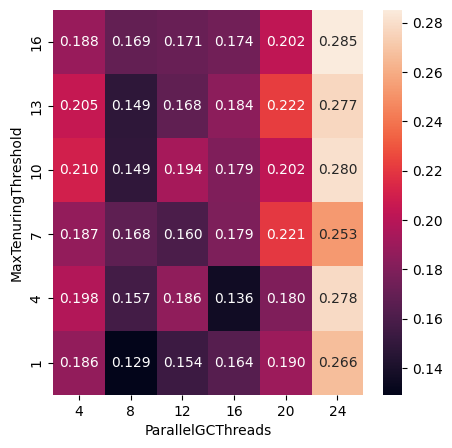

In [27]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/ext_h2_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values

plot_heatmap(x, y, z)

### AVRORA XMX

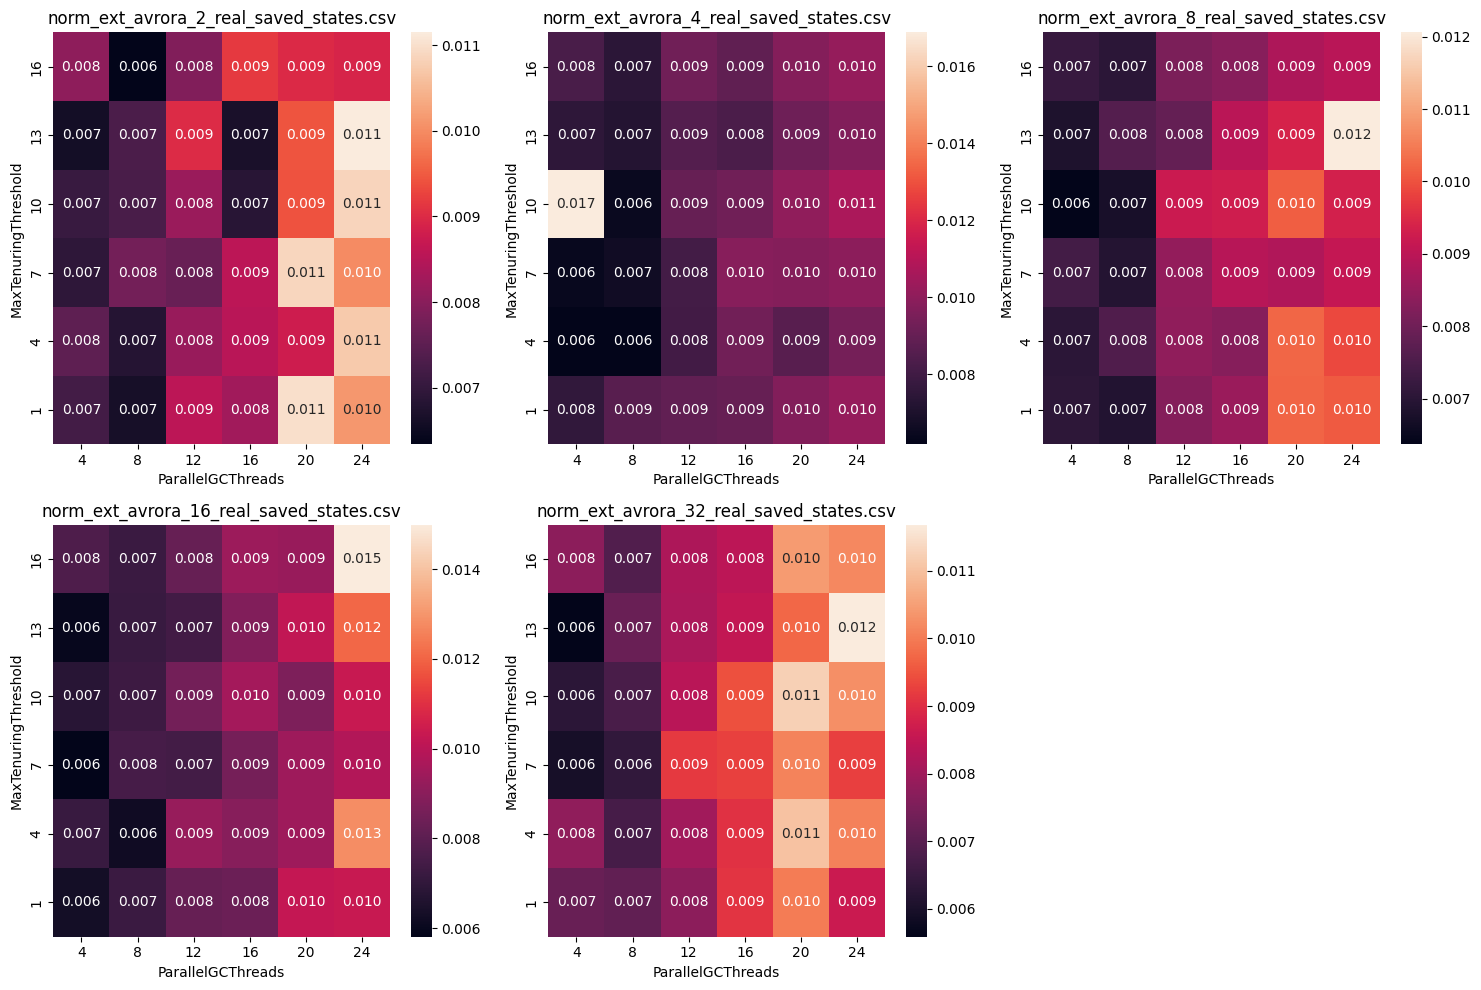

In [39]:
import re

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

flags = ["MaxTenuringThreshold", "ParallelGCThreads"]
goal="Average GC Pause"
i=0

files = sorted(glob.glob("datasets/avrora/norm_ext*"), 
               key=lambda x:float(re.findall("(\d+)",x)[0]))

for csv_file in files:
    df = pd.read_csv(csv_file)
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values
    z = df.iloc[:, 2].values
    
    data = pd.DataFrame({
        flags[0]: x, 
        flags[1]: y, 
        goal: z})
    
    data_pivoted = data.pivot(index=flags[0], columns=flags[1], values=goal)
    sns.heatmap(data_pivoted, annot=True,  ax=axs[i], fmt=".3f") # ax=axs[i],
    axs[i].invert_yaxis()
    axs[i].set_title(os.path.basename(csv_file))
    i += 1

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

### KAFKA XMX

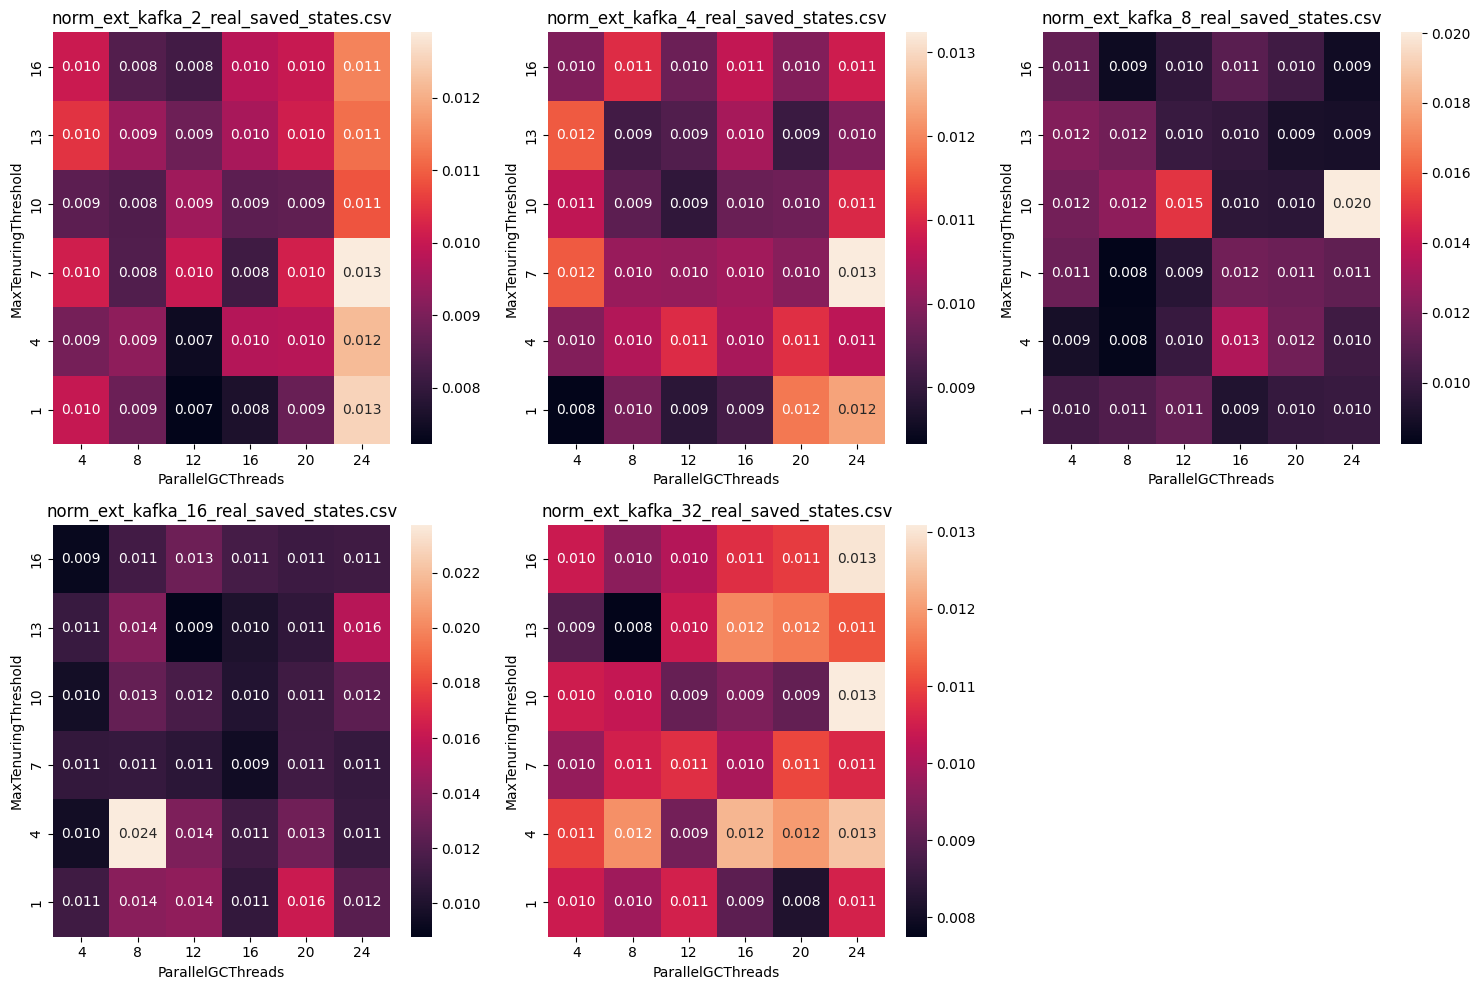

In [38]:
import re

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

flags = ["MaxTenuringThreshold", "ParallelGCThreads"]
goal="Average GC Pause"
i=0
files = sorted(glob.glob("datasets/kafka/norm_ext*"), 
               key=lambda x:float(re.findall("(\d+)",x)[0]))

for csv_file in files:
    df = pd.read_csv(csv_file)
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values
    z = df.iloc[:, 2].values
    
    data = pd.DataFrame({
        flags[0]: x, 
        flags[1]: y, 
        goal: z})
    
    data_pivoted = data.pivot(index=flags[0], columns=flags[1], values=goal)
    sns.heatmap(data_pivoted, annot=True,  ax=axs[i], fmt=".3f") # ax=axs[i],
    axs[i].invert_yaxis()
    axs[i].set_title(os.path.basename(csv_file))
    i += 1

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()
    

## Create a synthetic dataset

Многоэкстремальная двумерная функция, построена как сумма N гиперболических потенциалов.

http://conf.nsc.ru/files/conferences/Lyap-100/fulltext/72212/84279/%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2_%D0%90%D0%92_%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%90%D0%98_%D0%90%D0%BB%D0%B3.pdf

### Synthetic dataset 1

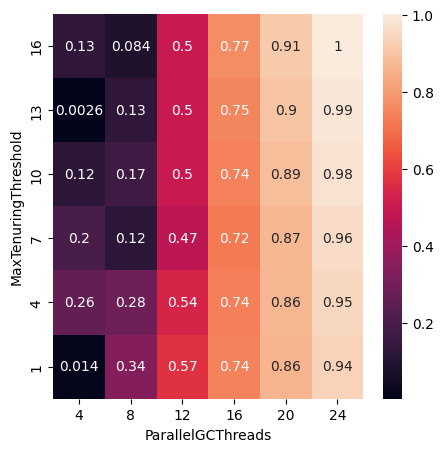

In [4]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 4)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("avrora_synthetic_saved_states.csv", index=False)

### Synthetic dataset 2

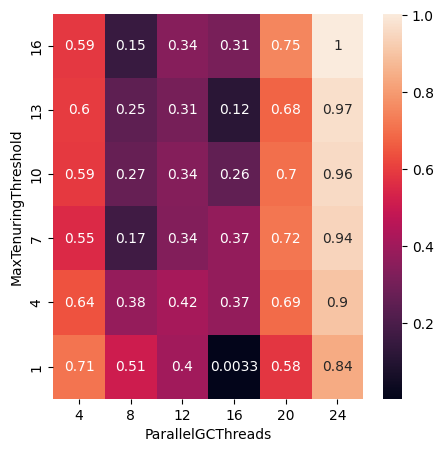

In [5]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 16)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 16)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("kafka_synthetic_saved_states.csv", index=False)

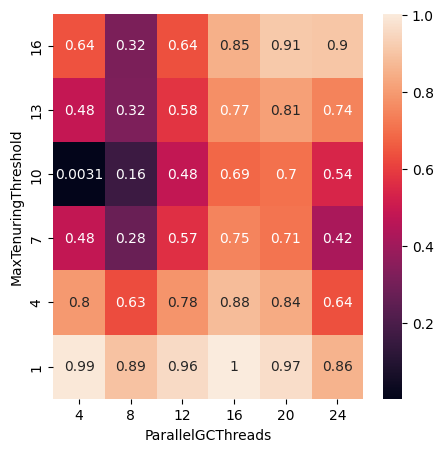

In [9]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 10)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 24)**1.5 + 0.02*abs(y - 7)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("test_synthetic_saved_states.csv", index=False)

# Create a dataset with extra parameters

In [2]:
# goals = ["avgGCPause", "totalTenuredUsedMax", "avgPause", "freedMemoryByFullGC", "avgPromotion"]
goals = [
    "avgGCPause", 
    "avgPromotion", 
    "promotionTotal", 
    "totalHeapUsedMaxpc", 
    "totalHeapUsedMax", 
    "totalYoungUsedMax", 
    "totalYoungUsedMaxpc", 
    "totalTenuredUsedMax",
]

In [10]:
bm = "avrora"
xmx = 32

x, y, z =  get_data_from_csv(f"summaries_{bm}/val/summary_gc_{bm}_{xmx}_*.csv", goals)

df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
df[goals] = z
display(df[:5])
df.to_csv(f"datasets/avrora/ext_{bm}_{xmx}_real_saved_states.csv", index=False)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df)

# normalized_df = df.copy()
# normalized_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(df)).iloc[:, 3:]
# display(normalized_df[:5])
# normalized_df.to_csv(f"datasets/norm_ext_avrora_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,16,0.00945,-188826.0,-944128.0,12.2,184.0,181.406,36.2,4747.0
1,10,20,0.01123,15.6,78.0,12.2,184.0,181.407,36.2,4804.0
2,1,4,0.00722,-89498.0,-447488.0,12.2,184.0,181.406,36.2,4720.0
3,13,16,0.00850,133.8,669.0,12.2,184.0,181.407,36.2,4777.0
4,13,20,0.00975,-182886.0,-914432.0,12.2,184.0,181.406,36.2,4720.0


In [5]:
bm = "kafka"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

kafka_df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
kafka_df[goals] = z
display(kafka_df[:5])
# df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,12,0.02917,18.142,126.997,21.7,7096.0,6942.777,64.0,166.521
1,10,8,0.02740,17.913,125.389,22.6,7382.0,7228.855,66.7,166.475
2,7,20,0.03037,18.347,128.429,21.8,7133.0,6980.122,64.4,166.423
3,10,4,0.03058,18.038,126.269,22.7,7429.0,7276.107,67.1,166.504
4,10,24,0.03323,18.145,127.018,22.7,7428.0,7274.998,67.1,166.503


In [23]:
bm = "h2"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

h2_df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
h2_df[goals] = z
display(h2_df[:5])
h2_df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,4,0.21015,94.274,754.188,35.0,11425.0,10839.973,100.0,814.539
1,7,20,0.22059,95.001,760.008,34.9,11423.0,10839.972,100.0,813.475
2,10,8,0.14916,83.676,753.083,35.5,11604.0,10839.989,100.0,847.287
3,1,24,0.26639,108.906,871.250,35.0,11425.0,10839.987,100.0,814.474
4,13,4,0.20498,93.689,749.509,34.9,11423.0,10839.988,100.0,812.446


### Normalized Dataset

### Avrora XMX

In [12]:
bm = "avrora"
dfs = []
for xmx in [2, 4, 8, 16, 32]:
    
    x, y, z =  get_data_from_csv(f"summaries_{bm}/summary_gc_{bm}_{xmx}_*.csv", goals)

    df = pd.DataFrame({
        "MaxTenuringThreshold": y,
        "ParallelGCThreads": x,
    })
    df[goals] = z
    dfs.append(df)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(pd.concat(dfs))

# normalized_df = df.copy()
# normalized_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(df)).iloc[:, 3:]
# display(normalized_df[:5])
# normalized_df.to_csv(f"datasets/norm_ext_avrora_real_saved_states.csv", index=False)

MinMaxScaler()

In [7]:
# bm = "avrora"
bm = "kafka"
for xmx in [2, 4, 8, 16, 32]:
    x, y, z =  get_data_from_csv(f"summaries_{bm}/summary_gc_{bm}_{xmx}_*.csv", goals)
    df = pd.DataFrame({
        "MaxTenuringThreshold": y,
        "ParallelGCThreads": x,
    })
    df[goals] = z
    
    # normalized_df = df.copy()
    # normalized_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(df)).iloc[:, 3:]
    # display(normalized_df[:5])
    # normalized_df.to_csv(f"datasets/avrora/norm_ext_avrora_{xmx}_real_saved_states.csv", index=False)
    
    df.to_csv(f"datasets/ext_{bm}_{xmx}_real_saved_states.csv", index=False)


### KAFKA XMX

In [32]:
bm = "kafka"
kafka_dfs = []
for xmx in [2, 4, 8, 16, 32]:
    
    x, y, z =  get_data_from_csv(f"summaries_{bm}/summary_gc_{bm}_{xmx}_*.csv", goals)

    kafka_df = pd.DataFrame({
        "MaxTenuringThreshold": y,
        "ParallelGCThreads": x,
    })
    kafka_df[goals] = z
    kafka_dfs.append(kafka_df)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(pd.concat(kafka_dfs))

for xmx in [2, 4, 8, 16, 32]:
    x, y, z =  get_data_from_csv(f"summaries_{bm}/summary_gc_{bm}_{xmx}_*.csv", goals)
    kafka_df = pd.DataFrame({
        "MaxTenuringThreshold": y,
        "ParallelGCThreads": x,
    })
    kafka_df[goals] = z
    
    normalized_kafka_df = kafka_df.copy()
    normalized_kafka_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(kafka_df)).iloc[:, 3:]
    display(normalized_kafka_df[:5])
    normalized_kafka_df.to_csv(f"datasets/{bm}/norm_ext_{bm}_{xmx}_real_saved_states.csv", index=False)


,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,16,4,0.01004,0.992679,0.990706,0.070423,0.015997,0.016267,0.980892,0.607461
1,16,8,0.00845,0.991301,0.990694,0.070423,0.015997,0.016267,0.980892,0.516616
2,1,20,0.00875,0.994496,0.990722,0.075117,0.017294,0.016168,0.980892,1.000000
3,4,24,0.01219,0.994137,0.990713,0.131455,0.025508,0.018433,0.936306,0.717602
4,7,24,0.01290,0.992581,0.990701,0.126761,0.025076,0.018433,0.936306,0.538301


,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,1,4,0.00832,0.993528,0.990677,0.741784,0.306961,0.30799,0.921444,0.469815
1,4,4,0.00994,0.996329,0.990687,0.741784,0.306961,0.30799,0.921444,0.452939
2,7,4,0.01153,0.997237,0.990690,0.741784,0.306961,0.30799,0.921444,0.509204
3,10,4,0.01063,0.996504,0.990687,0.741784,0.306961,0.30799,0.921444,0.456277
4,10,8,0.00950,0.997864,0.990692,0.741784,0.306961,0.30799,0.921444,0.627278


,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,1,8,0.01070,0.986314,0.990877,0.906103,0.735409,0.737983,0.643312,0.000429
1,7,24,0.01116,0.560922,0.367135,0.892019,0.730653,0.733301,0.634820,0.000827
2,16,8,0.00870,0.949091,0.936298,0.995305,0.766105,0.768837,0.698514,0.001164
3,1,20,0.00990,0.705698,0.579418,0.840376,0.712927,0.715520,0.602972,0.001654
4,16,4,0.01132,0.989852,0.998772,0.873239,0.723735,0.726226,0.622081,0.245980


,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,7,20,0.01131,0.807811,0.729143,0.065728,0.698227,0.700512,0.044586,0.001654
1,10,8,0.01266,0.990237,0.999619,0.051643,0.719412,0.721958,0.029724,0.246225
2,16,16,0.01148,0.956085,0.946553,0.164319,0.740164,0.742847,0.101911,0.000766
3,10,4,0.00958,0.986421,0.991034,0.230047,0.768266,0.770873,0.135881,0.000858
4,16,20,0.01116,0.737171,0.625566,0.154930,0.738003,0.740727,0.095541,0.001654


,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,1,24,0.01056,0.986570,0.991253,0.600939,0.902291,0.901674,0.352442,0.253729
1,1,4,0.01044,0.468600,0.611209,0.544601,0.903588,0.903074,0.312102,0.252412
2,13,8,0.00775,0.777737,0.837848,0.643192,0.956334,0.956131,0.367304,0.252718
3,4,20,0.01200,0.746963,0.639923,0.690141,0.941634,0.941187,0.403397,0.253760
4,13,4,0.00893,0.441324,0.191772,0.676056,0.969736,0.969463,0.386412,0.252994


### Separate

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(pd.concat([df, kafka_df, h2_df]))

MinMaxScaler()

In [18]:
normalized_df = df.copy()
normalized_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(df)).iloc[:, 3:]
display(normalized_df[:5])
# normalized_df.to_csv(f"datasets/norm_ext_avrora_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,20,0.01203,0.034202,0.034201,0.000000,0.000000,0.000000,0.00000,0.987496
1,10,16,0.00983,0.327170,0.327164,0.028736,0.028395,0.029228,0.02947,0.993101
2,7,24,0.01115,0.078306,0.078303,0.028736,0.028395,0.029228,0.02947,0.982538
3,16,8,0.00665,0.383423,0.383416,0.000000,0.000000,0.000000,0.00000,0.981675
4,1,20,0.00989,0.405474,0.405467,0.028736,0.028395,0.029228,0.02947,0.998922


In [19]:
normalized_kafka_df = kafka_df.copy()
normalized_kafka_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(kafka_df)).iloc[:, 3:]
display(normalized_kafka_df[:5])
# normalized_kafka_df.to_csv(f"datasets/norm_ext_kafka_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,12,0.02917,0.999999,0.999999,0.925287,0.928395,0.926321,0.925344,0.000023
1,10,8,0.02740,0.999998,0.999998,0.977011,0.978836,0.978139,0.978389,0.000013
2,7,20,0.03037,0.999999,0.999999,0.931034,0.934921,0.933085,0.933202,0.000002
3,10,4,0.03058,0.999999,0.999998,0.982759,0.987125,0.986698,0.986248,0.000019
4,10,24,0.03323,0.999999,0.999999,0.982759,0.986949,0.986498,0.986248,0.000019


In [26]:
normalized_h2_df = h2_df.copy()
normalized_h2_df.iloc[:, 3:] = pd.DataFrame(scaler.transform(h2_df)).iloc[:, 3:]
display(normalized_h2_df[:5])
# normalized_h2_df.to_csv(f"datasets/norm_ext_h2_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,avgPromotion,promotionTotal,totalHeapUsedMaxpc,totalHeapUsedMax,totalYoungUsedMax,totalYoungUsedMaxpc,totalTenuredUsedMax
0,10,4,0.21015,0.999957,0.988383,0.983278,0.981481,0.999997,1.0,0.139725
1,7,20,0.22059,0.999959,0.988386,0.979933,0.981277,0.999997,1.0,0.139495
2,10,8,0.14916,0.999934,0.988383,1.000000,0.999795,0.999999,1.0,0.146785
3,1,24,0.26639,0.999989,0.988434,0.983278,0.981481,0.999999,1.0,0.139711
4,13,4,0.20498,0.999956,0.988381,0.979933,0.981277,0.999999,1.0,0.139273
